In [ ]:
pip install numpy matplotlib pandas requests japanize-matplotlib setuptools pyserial requests

In [2]:
import serial
import csv
import os
from datetime import datetime
import threading
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import requests
import time
import threading
from collections import deque
from IPython.display import display, clear_output

/Users/oosugakaito/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import time
from collections import deque
from IPython.display import display, clear_output
import requests
import numpy as np
import pandas as pd

student_id = 26 # 学生番号の下3桁
url = f"http://192.168.{student_id}.2"
num = 11
interval_success = 0.5
interval_error = 1.0
queue = deque([0] * num)
values = []
max_errors = 100
error_count = 0
i = 0

plt.figure(figsize=(10, 6))

while i < num and error_count < max_errors:
    start = time.perf_counter()
    try:
        with requests.get(
            url,
            timeout=(2.0, 5.0), # (接続タイムアウト, 応答タイムアウト)
            headers={"Connection": "close"}
        ) as response:
            response.raise_for_status()
            value = response.json()['value']
            success = True
    except Exception as e:
        error_count += 1
        print(f"データ取得エラー({error_count}/{max_errors}):再試行します →", e)
        success = False

    if success:
        error_count = 0
        queue.popleft()
        queue.append(value)
        values.append(value)
        i += 1
        
        clear_output(wait=True)
        plt.cla()
        plt.plot(list(queue))
        plt.grid()
        plt.xlim(0, 10)
        plt.ylim(-5, 150)
        plt.xlabel("時間 (s)", fontsize=20, labelpad=8)
        plt.ylabel("心拍数 [bpm]", fontsize=20, labelpad=8)
        plt.tick_params(labelsize=16)
        
        current = queue[-1]
        avg = np.mean(values)
        plt.text(
            3, 110,
            f"現在の心拍数: {current} bpm\n平均心拍数: {avg:.1f} bpm",
            bbox={'facecolor': 'gray', 'alpha': 0.3, 'pad': 10},
            fontsize=20
        )
        display(plt.gcf())
        
        elapsed = time.perf_counter() - start
        rest = interval_success - elapsed
        if rest > 0:
            time.sleep(rest)
    else:
        time.sleep(interval_error)

データ取得エラー(1/100):再試行します → HTTPConnectionPool(host='192.168.26.2', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x1198680d0>, 'Connection to 192.168.26.2 timed out. (connect timeout=2.0)'))
データ取得エラー(2/100):再試行します → HTTPConnectionPool(host='192.168.26.2', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x11986eee0>, 'Connection to 192.168.26.2 timed out. (connect timeout=2.0)'))
データ取得エラー(2/100):再試行します → HTTPConnectionPool(host='192.168.26.2', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x11986eee0>, 'Connection to 192.168.26.2 timed out. (connect timeout=2.0)'))
データ取得エラー(3/100):再試行します → HTTPConnectionPool(host='192.168.26.2', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x11986e6d0>, 'Connection to 1

KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

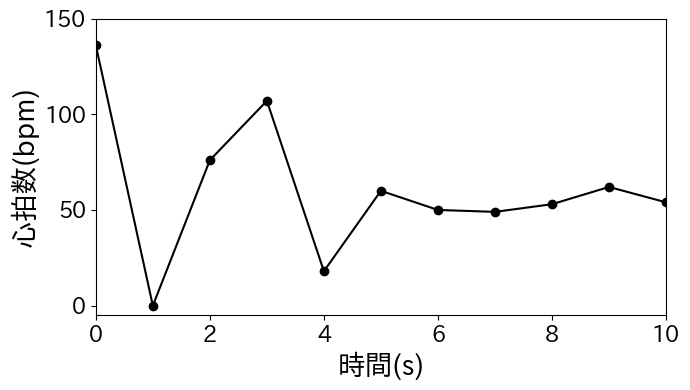

In [9]:
data = pd.read_csv("result_integration.csv", parse_dates=True)
plt.figure(figsize=(7, 4))
plt.plot(data['heartrate'], marker='o', color="k", linestyle="-", markersize=6)
plt.xlabel("時間(s)", fontsize=20)
plt.ylabel("心拍数(bpm)", fontsize=20)
plt.ylim(-5,150)
plt.xlim(0,10)
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig("result_integration.png")

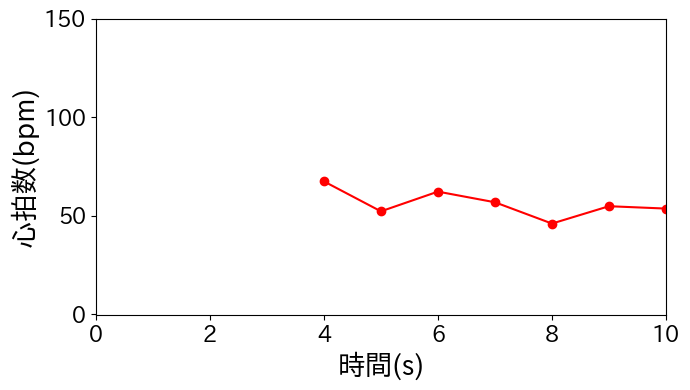

In [11]:
data= pd.read_csv("result_integration.csv")
window_size=5
data['MA']=data['heartrate'].rolling(window=window_size).mean()
plt.figure(figsize=(7, 4))
plt.plot(data['MA'], marker='o', color="r", linestyle="-", markersize=6)
plt.xlabel("時間(s)", fontsize=20)
plt.ylabel("心拍数(bpm)", fontsize=20)
plt.ylim(-0.5,150)
plt.xlim(0,10)
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig("result_integration_MA.png")

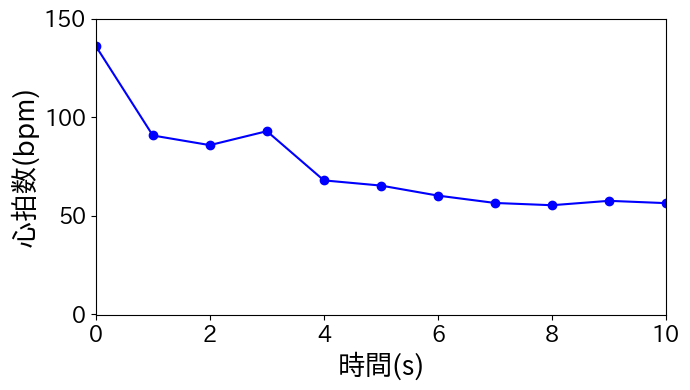

In [13]:
data= pd.read_csv("result_integration.csv")
window_size=5
data['SMA']=data['heartrate'].rolling(window=window_size).mean()
data['EMA']=data['heartrate'].ewm(span=window_size,adjust=False).mean()
plt.figure(figsize=(7, 4))
plt.plot(data['EMA'], marker='o', color="b", linestyle="-", markersize=6)
plt.xlabel("時間(s)", fontsize=20)
plt.ylabel("心拍数(bpm)", fontsize=20)
plt.ylim(-0.5,150)
plt.xlim(0,10)
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig("result_integration_EMA.png")